# Logscale

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss
import vega_datasets

## Ratio and logarithm

If you use linear scale to visualize ratios, it can be quite misleading. 

Let's create some ratios to ilustrate this.

In [54]:
x = np.array([1,    1,   1,  1, 10, 100, 1000])
y = np.array([1000, 100, 10, 1, 1,  1,   1   ])
ratio = x/y
print(ratio)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


**Q: Plot on the linear scale using the [`scatter()`](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html) function. Also draw a horizontal line at ratio=1 for a reference. The x-axis will be simply the data ID that refers to each ratio data point. Y-axis will be the ratio values.**

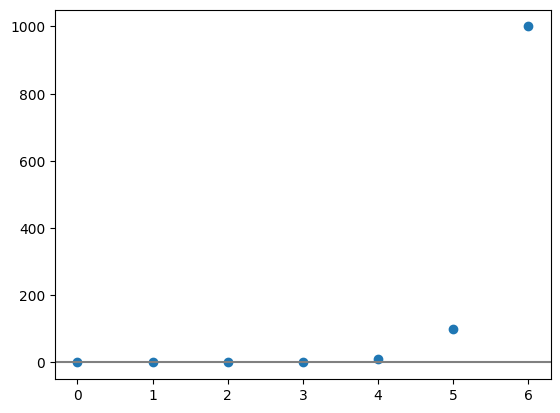

In [55]:
X = np.arange(len(ratio))

# Implement
plt.scatter(X, ratio)
plt.axhline(y=2, color='gray')

**Q: Is this a good visualization of the ratio data? Why? Why not? Explain.**

In [56]:
# it is not since we can't visualize that there is a difference between the first 4/5 ratios
# the procentage of groth might be more relevant here 

**Q: Can you fix it?**

Text(0.5, 1.0, 'Scatter Plot of Ratio with Log Y-Axis')

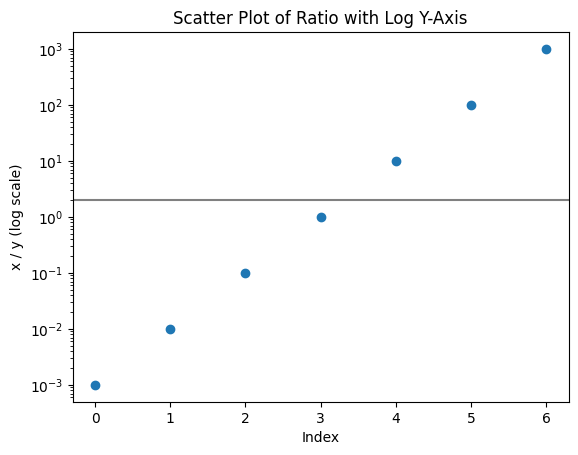

In [57]:
# Implement
plt.scatter(X, ratio)
plt.axhline(y=2, color='gray')
plt.yscale('log')
plt.xlabel("Index")
plt.ylabel("x / y (log scale)")
plt.title("Scatter Plot of Ratio with Log Y-Axis")

## Log-binning

One way to draw a histogram in log-scale, with a broadly distributed data, is by using log-binning.

First, see what happens if we do not use the log scale for a dataset with a heavy tail. 

**Q: Load the movie dataset from `vega_datasets` and remove the NaN rows based on the following three columns: `IMDB_Rating`, `IMDB_Votes`, `Rotten_Tomatoes_Rating`.**

In [58]:
# TODO: Implement the functionality mentioned above 
# The following code is just a dummy. You should load the correct dataset from vega_datasets package. 
movies = vega_datasets.data.movies()
movies['IMDB_Rating'].dropna(inplace=True)
movies['IMDB_Votes'].dropna(inplace=True)
movies['Rotten_Tomatoes_Rating'].dropna(inplace=True)

If you simply call `hist()` method with a dataframe object, it identifies all the numeric columns and draws a histogram for each column. 

**Q: draw all possible histograms of the movie dataframe. Adjust the size of the plots if needed.**

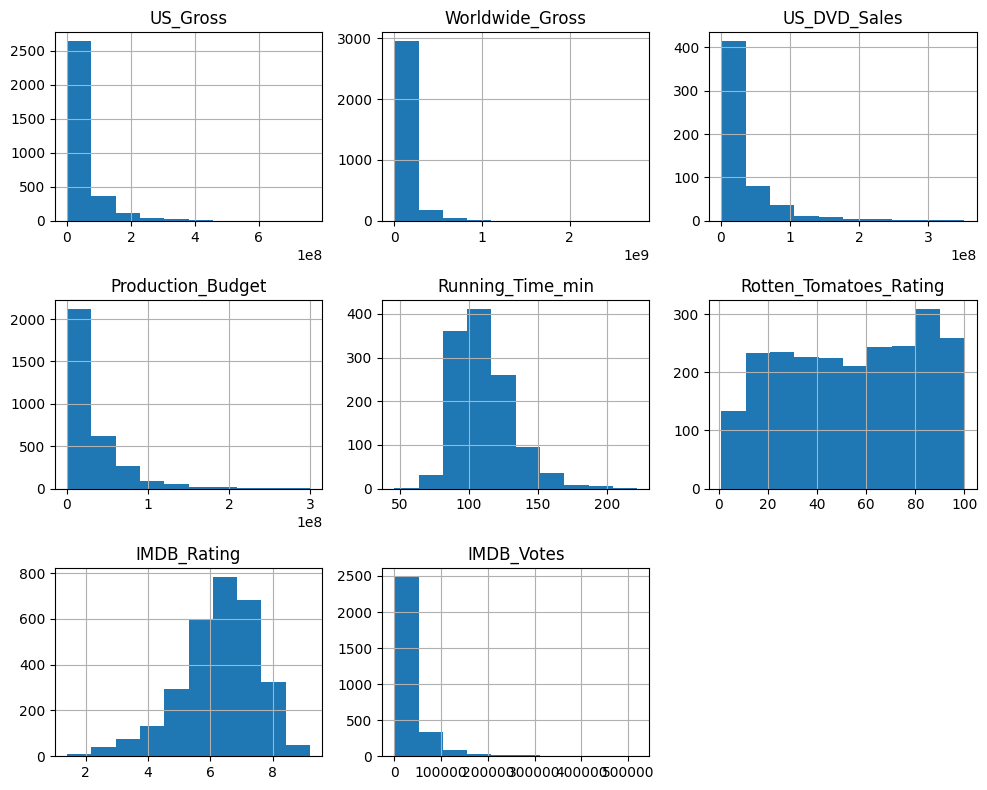

In [59]:
# Implement
movies.hist(figsize=(10, 8))
plt.tight_layout()

As we can see, a majority of the columns are not normally distributed. In particular, if you look at the worldwide gross variable, you only see a couple of meaningful data from the histogram. Is this a problem of resolution? How about increasing the number of bins?

Text(0, 0.5, 'Frequency')

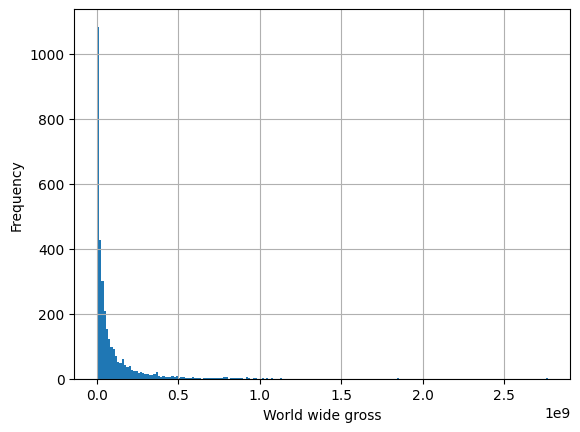

In [60]:
ax = movies["Worldwide_Gross"].hist(bins=200)
ax.set_xlabel("World wide gross")
ax.set_ylabel("Frequency")

Maybe a bit more useful, but it doesn't tell anything about the data distribution above certain point. How about changing the vertical scale to logarithmic scale?

Text(0, 0.5, 'Frequency')

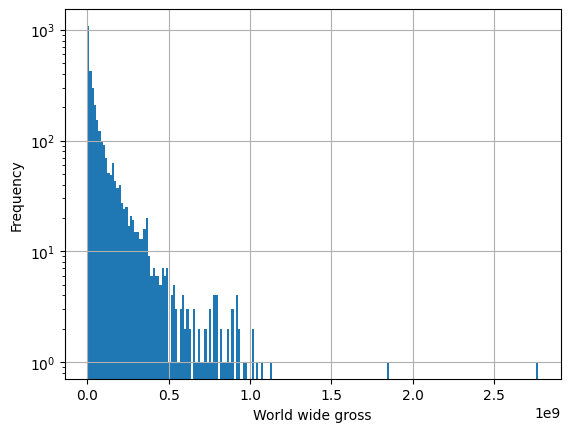

In [61]:
ax = movies["Worldwide_Gross"].hist(bins=200)
ax.set_yscale('log')
ax.set_xlabel("World wide gross")
ax.set_ylabel("Frequency")

Now, let's try log-bin. Recall that when plotting histgrams we can specify the edges of bins through the `bins` parameter. For example, we can specify the edges of bins to [1, 2, 3, ... , 10] as follows.


<Axes: >

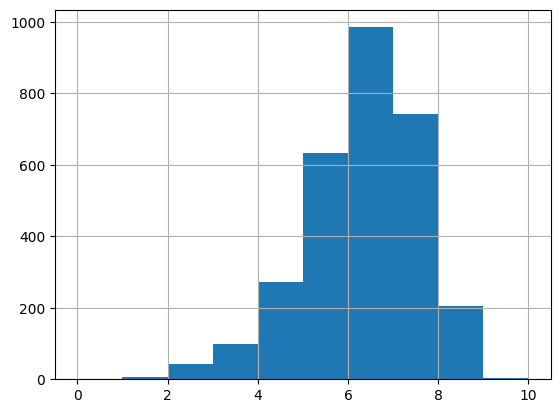

In [62]:
movies["IMDB_Rating"].hist(bins=range(0,11))

<Axes: >

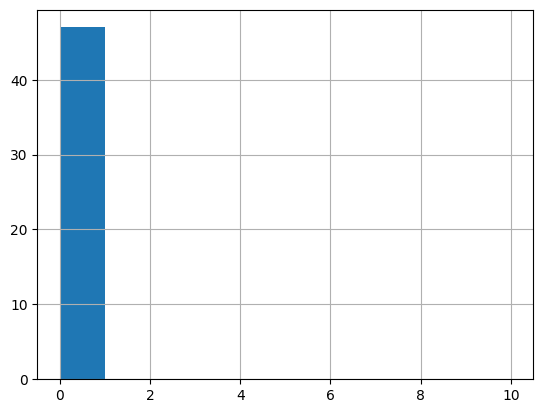

In [63]:
movies["Worldwide_Gross"].hist(bins=range(0,11))

Here, we can specify the edges of bins in a similar way. Instead of specifying on the linear scale, we do it on the log space. Some useful resources:

* [numpy.logspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html)
* [numpy.linspace vs numpy.logspace](http://stackoverflow.com/questions/31480033/difference-in-output-between-numpy-linspace-and-numpy-logspace)

Hint: since $10^{\text{start}} = \text{min(Worldwide_Gross)}$, $\text{start} = \log_{10}(\text{min(Worldwide_Gross)})$

In [64]:
min(movies["Worldwide_Gross"])

0.0

Because there seems to be movie(s) that made $0, and because log(0) is undefined & log(1) = 0, let's add 1 to the variable.  

In [68]:
movies["Worldwide_Gross"] = movies["Worldwide_Gross"]+1.0

In [ ]:
# TODO: Replace the dummy value of bins using np.logspace.  
# Create 20 bins that cover the whole range of the dataset. 
mini = min(movies["Worldwide_Gross"]) + 1
maxi = max(movies["Worldwide_Gross"])
bins = np.logspace(np.log10(mini), np.log10(maxi), num=20)
bins

array([3.00000000e+00, 8.89129098e+00, 2.63516851e+01, 7.81001668e+01,
       2.31470436e+02, 6.86023667e+02, 2.03321202e+03, 6.02595989e+03,
       1.78595209e+04, 5.29313992e+04, 1.56876157e+05, 4.64943855e+05,
       1.37798370e+06, 4.08401802e+06, 1.21040642e+07, 3.58735856e+07,
       1.06320829e+08, 3.15109811e+08, 9.33911006e+08, 2.76789150e+09])

Now we can plot a histogram with log-bin. Set both axis to be log-scale. 

Text(0, 0.5, 'Frequency')

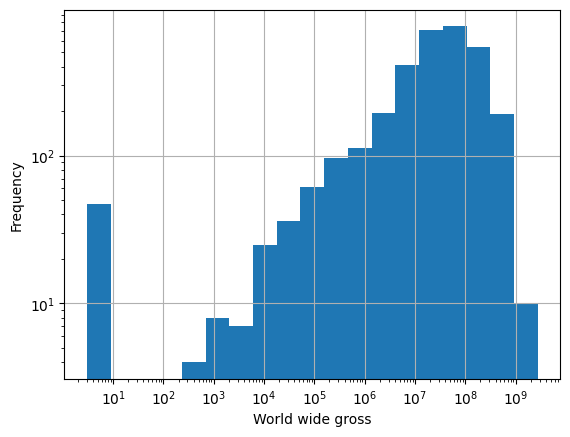

In [72]:
ax = (movies["Worldwide_Gross"]+1.0).hist(bins=bins)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("World wide gross")
ax.set_ylabel("Frequency")

What is going on? Is this the right plot?

**Q: explain and fix**

Text(0, 0.5, 'Frequency')

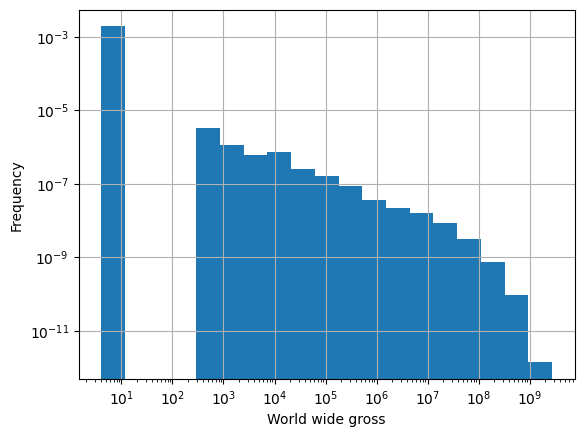

In [ ]:
# Implement
# density=True ---->>> Adjusts bar height based on bin width, this is necessary for log bins.
mini = min(movies["Worldwide_Gross"]) + 1
maxi = max(movies["Worldwide_Gross"])
bins = np.logspace(np.log10(mini), np.log10(maxi), num=20)

ax = (movies["Worldwide_Gross"]+1.0).hist(bins=bins, density=True)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("World wide gross")
ax.set_ylabel("Frequency")

**Q: Can you explain the plot? Why are there gaps?**

In [ ]:
# Because the bins use a logarithmic scale they show ranges of values 
# If there are not many movies in a specific range the bar for that range will be shorter
# or might not show up at all, creating gaps between the bars.

## CCDF

CCDF is a nice alternative to examine distributions with heavy tails. The idea is same as CDF, but the direction of aggregation is opposite. For a given value x, CCDF(x) is the number (fraction) of data points that are same or larger than x. To write code to draw CCDF, it'll be helpful to draw it by hand by using a very small, toy dataset. Draw it by hand and then think about how each point in the CCDF plot can be computed. 

**Q: Draw a CCDF of worldwide gross data in log-log scale**

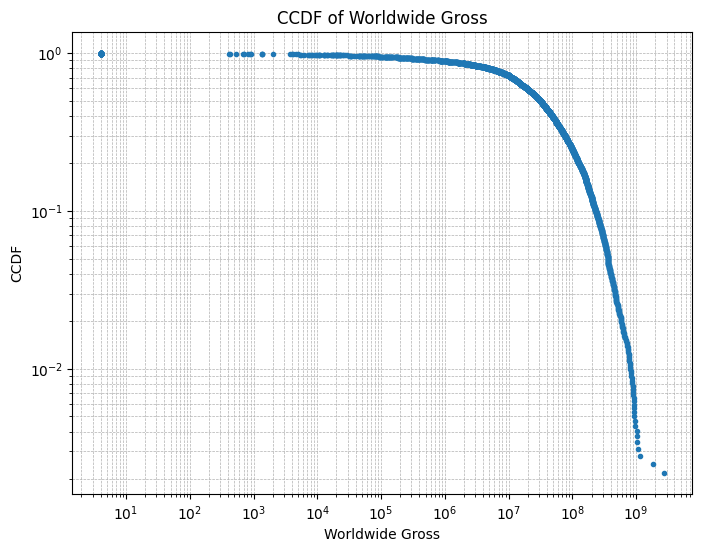

In [82]:
# TODO: Implement functionality mentioned above
# You must replace the dummy values with the correct code. 
gross = np.array(movies["Worldwide_Gross"])
gross = gross + 1
worldgross_sorted = np.sort(gross)

ccdf_y = 1.0 - np.arange(1, len(worldgross_sorted)+1) / len(worldgross_sorted)
plt.figure(figsize=(8, 6))
plt.loglog(worldgross_sorted, ccdf_y, marker='.', linestyle='none')
plt.xlabel('Worldwide Gross')
plt.ylabel('CCDF')
plt.title('CCDF of Worldwide Gross')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

We can also try in semilog scale (only one axis is in a log-scale), where the horizontal axis is linear. 

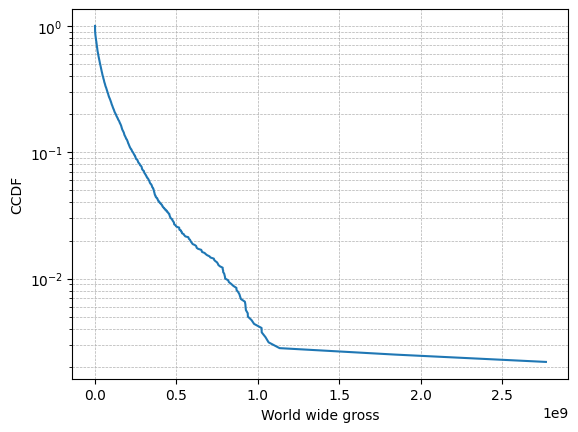

In [84]:
plt.xlabel("World wide gross")
plt.ylabel("CCDF")
plt.plot(worldgross_sorted, ccdf_y)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.yscale('log')

A straight line in semilog scale means exponential decay (cf. a straight line in log-log scale means power-law decay). So it seems like the amount of money a movie makes across the world follows *roughly* an exponential distribution, while there are some outliers that make insane amount of money. 

**Q: Which is the most successful movie in our dataset?**

You can use the following

- `idxmax()`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html
- `loc`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html

In [90]:
# Implement
idx = movies['Worldwide_Gross'].idxmax()
movies.loc[idx]

Title                                  Avatar
US_Gross                          760167650.0
Worldwide_Gross                  2767891502.0
US_DVD_Sales                      146153933.0
Production_Budget                 237000000.0
Release_Date                      Dec 18 2009
MPAA_Rating                             PG-13
Running_Time_min                          NaN
Distributor                  20th Century Fox
Source                    Original Screenplay
Major_Genre                            Action
Creative_Type                 Science Fiction
Director                        James Cameron
Rotten_Tomatoes_Rating                   83.0
IMDB_Rating                               8.3
IMDB_Votes                           261439.0
Name: 1234, dtype: object

# Paired t-test

- Dependencies: scipy pandas seaborn pingouin

In [91]:
import pandas as pd
import scipy.stats as stats
import pingouin as pg

__Paired Sample T-test__

The paired sample t-test is also known as the dependent sample t-test, and paired t-test. This type of t-test compares two averages (means) and will give you information if the difference between these two averages are zero. In a paired sample t-test, each participant is measured twice, which results in pairs of observations. The t-test also tells you whether the differences are statistically significant. In other words it lets you know if those differences could have happened by chance.

__Q: When to use this test?__

For example, if clinical psychologists want to test whether a  treatment for depression will change the quality of life, they might set up an experiment. In this experiment, they will collect information about the participants’ quality of life before the intervention. They are conducting a pre- and post-test study. In the pre-test the average quality of life might be 3, while in the post-test the average quality of life might be  5. Numerically, we could think that the treatment is working. However, it could be due to a fluke and, in order to test this, the clinical researchers can use the paired sample t-test. 

__Hypotheses__

Now, when performing dependent sample t-tests you typically have the following two hypotheses:

1. Null hypotheses: the true mean difference is equal to zero (between the observations), i.e. the means are equal;
2. Alternative hypotheses: the true mean difference is not equal to zero (two-tailed), i.e. the means are different.

Note, in some cases we also may have a specific idea, based on theory, about the direction of the measured effect. For example, we may strongly believe (due to previous research and/or theory) that a specific intervention should have a positive effect. In such a case, the alternative hypothesis will be something like: the true mean difference is greater than zero (one-tailed). Note, it can also be smaller than zero, of course. 

__Assumptions__

Besides that the dependent variable is on interval/ratio scale, and is continuous, there are three assumptions that need to be met:
1. Are the two samples independent?
2. Does the data, i.e., the differences for the matched-pairs, follow a normal distribution?
3. Do the two samples have the same variances?

If your data is not following a normal distribution you can  transform your dependent variable using square root, log, or Box-Cox in Python. In the next section, we will import data.

## data

In [92]:
data = 'https://gist.githubusercontent.com/baskaufs/1a7a995c1b25d6e88b45/raw/4bb17ccc5c1e62c27627833a4f25380f27d30b35/t-test.csv'
df = pd.read_csv(data)

df.head()

,grouping,height
0,men,181.5
1,men,187.3
2,men,175.3
3,men,178.3
4,men,169.0


In [93]:
# subset the data
male = df.query('grouping == "men"')['height']
female = df.query('grouping == "women"')['height']

__Descriptive statistics__: use the groupby method together with the describe method to calculate summary statistics. As we are interested in the difference between ‘A’ and ‘B’, in the dataset, we used ‘grouping’ as input to the groupby method.

In [94]:
df.groupby('grouping').describe()

height                                                           
          count        mean       std    min     25%    50%     75%    max
grouping                                                                  
men         7.0  179.871429  6.216836  169.0  176.80  181.5  183.85  187.3
women       7.0  171.057143  5.697619  165.2  166.65  170.3  173.75  181.1

## Two-Sample T-Test with Pingouin

In [95]:
pg.ttest(male, female, paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.85249,6,two-sided,0.029087,"[1.25, 16.38]",1.478192,2.973,0.899761


- Interpreting the P-value

Now, the p-value of the test is 0.029087, which is less than the significance level alpha (e.g., 0.05). Furthermore, this means that we can conclude that the men’s average height is statistically different from the female’s average height. 

Specifically, a p-value is a probability of obtaining an effect at least as extreme as the one in the data you have obtained (i.e., your sample), assuming that the null hypothesis is true. Moreover, p-values address only one question which is concerned about how likely your collected data is, assuming a true null hypothesis? Importantly, it cannot be used as support for the alternative hypothesis.

- Interpreting the Effect Size (Cohen’s D)

One common way to interpret Cohen’s D that is obtained in a t-test is in terms of the relative strength of e.g. the condition. Cohen (1988) suggested that d=0.2 should be considered a ‘small’ effect size, 0.5 is a ‘medium’ effect size, and that 0.8 is a ‘large’ effect size. This means that if two groups’ means don’t differ by 0.2 standard deviations or more, the difference is trivial, even if it is statistically significant.

![interpret ttest](c07_pingouin.jpeg)

## Draw the data

C:\Users\Tudor\AppData\Local\Temp\ipykernel_8596\2650643124.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='grouping', y='height', data=df, palette='Set2')


<Axes: xlabel='grouping', ylabel='height'>

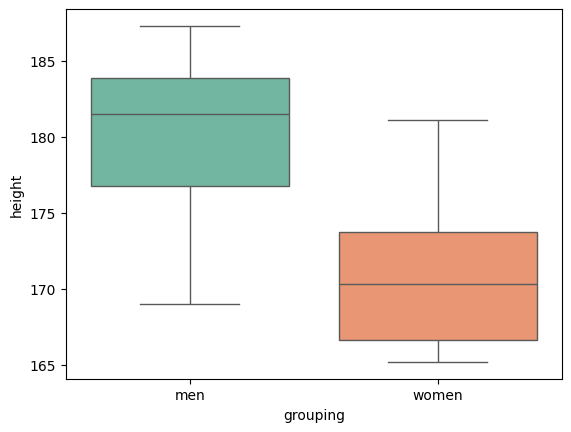

In [105]:
import seaborn as sns

sns.boxplot(x='grouping', y='height', data=df, palette='Set2')